In [2]:
import numpy as np
import pandas as pd
import time
import random
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.models import load_model

import gym
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def plot_state(obs):
    plt.figure(figsize=(12,8))
    plt.imshow(obs)
    plt.axis("off")
    plt.show()

In [3]:
env = gym.make("Breakout-v0")
init = env.reset()

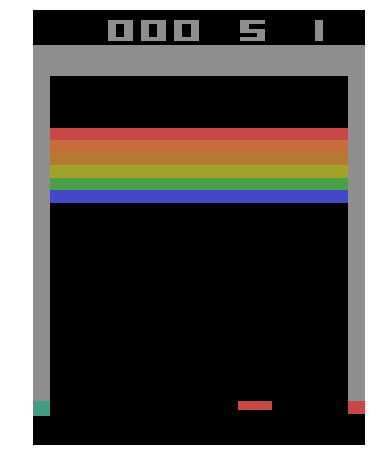

In [4]:
plot_state(init)

In [5]:
init = init.mean(axis=-1,keepdims=1)
init = init.astype('float32') / 255

In [6]:
init.shape

(210, 160, 1)

In [7]:
init[init > 0] = 1

In [8]:
init.max()

1.0

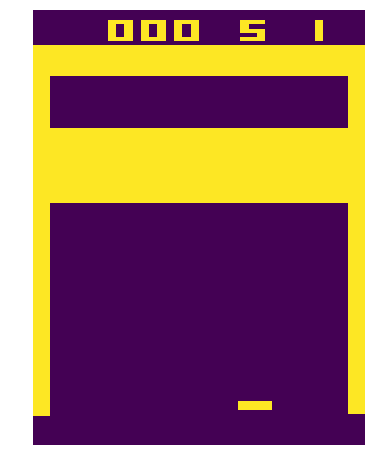

In [9]:
plot_state(init.reshape(210,160))

In [10]:
env.action_space

Discrete(4)

In [11]:
env.observation_space.shape

(210, 160, 3)

In [12]:
inp = Input(shape=init.shape)
x = Conv2D(32, (5,5), padding="same")(inp)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
output = Dense(env.action_space.n)(x)

model = Model(inp, output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 210, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 210, 160, 32)      832       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1075200)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4300804   
Total params: 4,301,636
Trainable params: 4,301,636
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
def process_obs(obs):
    obs = obs.mean(axis=-1,keepdims=1)
    obs = obs.astype('float32') / 255
    obs[obs > 0] = 1
    obs = np.expand_dims(obs,0)
    return obs

In [14]:
env = gym.make("Breakout-v0")
observation = env.reset()
observation = process_obs(observation)


episodes = 100
epsilon = 0.7
gamma = 0.9
done = False

history = {}


for i in range(1, episodes):
    print("Welcome to AI Breakout!")
    print("Starting Game {} of {}...\n".format(i, episodes))
    
    history = {"input":[], "reward":[], "action": [], "Q":[]}
    sum = 0
    game = True
    while game:
        
        rand = np.random.uniform(0,1)
        if  rand < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(model.predict(observation))
          
        observation, reward, done, info = env.step(action)
        observation = process_obs(observation)
        
        history["input"].append(observation)
        history["action"].append(action)
        history["reward"].append(reward)
        sum += reward

        #time.sleep(0.001)
        env.render()
        
        if done:
        
            Q = []
            for j,k in enumerate(history["reward"][::-1]):
                if j == 0:
                    val = np.array([[0, 0, 0, 0]])
                    val[0,history["action"][-1]] = k
                    Q.append(val)
                else:
                    val = np.array([[0, 0, 0, 0]])
                    val[0,history["action"][-1-j]] = k + gamma*Q[-1][0].sum()
                    Q.append(val)
            
            Q = np.array(Q[::-1])
            Q = Q.reshape(Q.shape[0],Q.shape[2])


            history["Q"] = Q 
            
            if sum < 3:
                observation = env.reset()
                observation = process_obs(observation)
                game = False
            else:
                print("Training the model...")
            
                history["input"] = np.array(history["input"])
                history["input"] = history["input"].reshape((history["input"].shape[0],\
                                                         history["input"].shape[2],\
                                                         history["input"].shape[3],\
                                                         history["input"].shape[4]))
            
                model.fit(history["input"], history["Q"], epochs = 1, batch_size=100)
            
            
                print("Total game score was: {}\n".format(sum))
            
                observation = env.reset()
                observation = process_obs(observation)
                #epsilon -= 0.01
                game = False
                             
        else:
            pass
            
         

Welcome to AI Breakout!
Starting Game 1 of 200...

Welcome to AI Breakout!
Starting Game 2 of 200...

Training the model...
Epoch 1/5
378/378 [==============================] - 8s 22ms/step - loss: 1077.8634 - mean_squared_error: 1077.8634
Epoch 2/5
378/378 [==============================] - 8s 22ms/step - loss: 571.8044 - mean_squared_error: 571.8044
Epoch 3/5
378/378 [==============================] - 8s 22ms/step - loss: 327.9077 - mean_squared_error: 327.9077
Epoch 4/5
378/378 [==============================] - 8s 20ms/step - loss: 194.3504 - mean_squared_error: 194.3504
Epoch 5/5
378/378 [==============================] - 8s 21ms/step - loss: 41.7429 - mean_squared_error: 41.7429
Total game score was: 4.0

Welcome to AI Breakout!
Starting Game 3 of 200...

Training the model...
Epoch 1/5
311/311 [==============================] - 7s 21ms/step - loss: 107.0152 - mean_squared_error: 107.0152
Epoch 2/5
311/311 [==============================] - 7s 22ms/step - loss: 9.5542 - mean_squa

Welcome to AI Breakout!
Starting Game 20 of 200...

Welcome to AI Breakout!
Starting Game 21 of 200...

Training the model...
Epoch 1/5
326/326 [==============================] - 7s 21ms/step - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 2/5
326/326 [==============================] - 7s 21ms/step - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 3/5
326/326 [==============================] - 7s 21ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 4/5
326/326 [==============================] - 7s 21ms/step - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 5/5
326/326 [==============================] - 7s 23ms/step - loss: 0.0240 - mean_squared_error: 0.0240
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 22 of 200...

Welcome to AI Breakout!
Starting Game 23 of 200...

Welcome to AI Breakout!
Starting Game 24 of 200...

Training the model...
Epoch 1/5
261/261 [==============================] - 6s 22ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 2/5

Training the model...
Epoch 1/5
275/275 [==============================] - 6s 21ms/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 2/5
275/275 [==============================] - 6s 21ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 3/5
275/275 [==============================] - 6s 22ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 4/5
275/275 [==============================] - 5s 19ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 5/5
275/275 [==============================] - 6s 21ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 51 of 200...

Welcome to AI Breakout!
Starting Game 52 of 200...

Training the model...
Epoch 1/5
263/263 [==============================] - 6s 23ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 2/5
263/263 [==============================] - 6s 21ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 3/5
263/263 [==============================] - 5s

Welcome to AI Breakout!
Starting Game 82 of 200...

Welcome to AI Breakout!
Starting Game 83 of 200...

Welcome to AI Breakout!
Starting Game 84 of 200...

Welcome to AI Breakout!
Starting Game 85 of 200...

Training the model...
Epoch 1/5
265/265 [==============================] - 7s 25ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 2/5
265/265 [==============================] - 7s 26ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 3/5
265/265 [==============================] - 7s 25ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 4/5
265/265 [==============================] - 7s 28ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 5/5
265/265 [==============================] - 7s 26ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 86 of 200...

Welcome to AI Breakout!
Starting Game 87 of 200...

Welcome to AI Breakout!
Starting Game 88 of 200...

Training the model...
Epoch 1/5
342/3

288/288 [==============================] - 7s 26ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 2/5
288/288 [==============================] - 7s 25ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 3/5
288/288 [==============================] - 7s 25ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 4/5
288/288 [==============================] - 7s 26ms/step - loss: 0.0033 - mean_squared_error: 0.0033 
Epoch 5/5
288/288 [==============================] - 8s 26ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 111 of 200...

Welcome to AI Breakout!
Starting Game 112 of 200...

Training the model...
Epoch 1/5
434/434 [==============================] - 10s 24ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 2/5
434/434 [==============================] - 11s 26ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 3/5
434/434 [==============================] - 10s 24ms/step - loss: 0.0031 

303/303 [==============================] - 7s 21ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 132 of 200...

Welcome to AI Breakout!
Starting Game 133 of 200...

Welcome to AI Breakout!
Starting Game 134 of 200...

Training the model...
Epoch 1/5
322/322 [==============================] - 8s 25ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 2/5
322/322 [==============================] - 8s 26ms/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 3/5
322/322 [==============================] - 9s 28ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 4/5
322/322 [==============================] - 10s 30ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 5/5
322/322 [==============================] - 8s 24ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 135 of 200...

Welcome to AI Breakout!
Starting Game 136 of 200...

Welcome 

295/295 [==============================] - 7s 23ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 2/5
295/295 [==============================] - 7s 24ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 3/5
295/295 [==============================] - 7s 24ms/step - loss: 0.0018 - mean_squared_error: 0.0018   
Epoch 4/5
295/295 [==============================] - 7s 25ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/5
295/295 [==============================] - 8s 26ms/step - loss: 0.0016 - mean_squared_error: 0.0016 
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 158 of 200...

Training the model...
Epoch 1/5
323/323 [==============================] - 8s 26ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2/5
323/323 [==============================] - 8s 26ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 3/5
323/323 [==============================] - 8s 26ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 4/5
323/323 [=====

338/338 [==============================] - 8s 25ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2/5
338/338 [==============================] - 8s 24ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 3/5
338/338 [==============================] - 8s 24ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 4/5
338/338 [==============================] - 8s 25ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 5/5
338/338 [==============================] - 9s 26ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 175 of 200...

Welcome to AI Breakout!
Starting Game 176 of 200...

Welcome to AI Breakout!
Starting Game 177 of 200...

Training the model...
Epoch 1/5
287/287 [==============================] - 8s 26ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 2/5
287/287 [==============================] - 8s 28ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 3/5
287/287 [=============

Training the model...
Epoch 1/5
331/331 [==============================] - 7s 22ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 2/5
331/331 [==============================] - 8s 23ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 3/5
331/331 [==============================] - 7s 22ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 4/5
331/331 [==============================] - 7s 22ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 5/5
331/331 [==============================] - 8s 23ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Total game score was: 3.0

Welcome to AI Breakout!
Starting Game 195 of 200...

Training the model...
Epoch 1/5
365/365 [==============================] - 10s 28ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2/5
365/365 [==============================] - 11s 30ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/5
365/365 [==============================] - 10s 27ms/step - loss: 0.0024 - mean_squared_error: 

In [15]:
model.predict(observation)

array([[ 0.00772207,  0.00635695,  0.00357603, -0.00438944]],
      dtype=float32)

In [16]:
observation.shape

(1, 210, 160, 1)

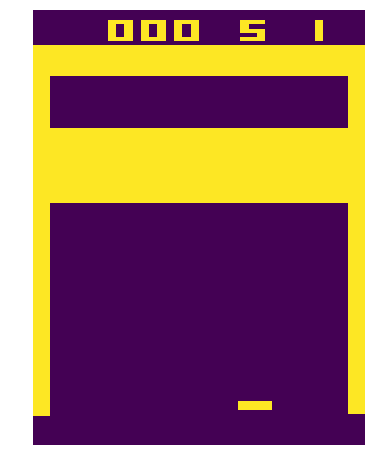

In [17]:
plot_state(observation.reshape((210,160)))

# Saving Model

In [18]:
#model.save("breakout-atari-rl.h5")

# Testing the Model

In [5]:
mod = load_model("breakout-atari-rl.h5")

In [9]:
env = gym.make("Breakout-v0")
observation = env.reset()
observation = process_obs(observation)


episodes = 10
gamma = 0.9
done = False
epsilon = 0.2

history = {}


for i in range(1, episodes):
    print("Welcome to AI Breakout!")
    print("Starting Game {} of {}...".format(i, episodes))
    
    sum = 0
    game = True
    obs = []
    while game:
        
        if (len(obs) == 0):
            action = 1
        elif (len(obs) > 1) and (np.array_equal(obs[-1],obs[-2])):
            action = 1
        else:
            rand = np.random.uniform(0,1)
            if  rand < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(mod.predict(observation))
            
        #print(action)
        observation, reward, done, info = env.step(action)
        observation = process_obs(observation)
        obs.append(observation)

        sum += reward
        time.sleep(0.01)
        env.render()

        if done:
            print("Total game score was: {}\n".format(sum))
            observation = env.reset()
            observation = process_obs(observation)
            game = False
env.close()        

Welcome to AI Breakout!
Starting Game 1 of 10...
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 2 of 10...
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 3 of 10...
Total game score was: 2.0

Welcome to AI Breakout!
Starting Game 4 of 10...
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 5 of 10...
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 6 of 10...
Total game score was: 0.0

Welcome to AI Breakout!
Starting Game 7 of 10...
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 8 of 10...
Total game score was: 1.0

Welcome to AI Breakout!
Starting Game 9 of 10...
Total game score was: 0.0

